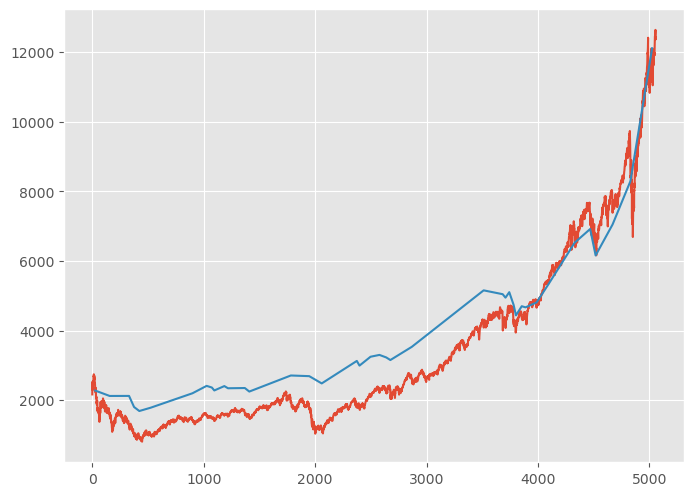

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

rsi=pd.read_csv('C:/Users/johnn/OneDrive/桌面/repo/Data/Indicators/RSI/Nasdaq.csv')
df=pd.read_csv('C:/Users/johnn/OneDrive/桌面/repo/Data/Raw/c_Nasdaq.csv')

N=9

a1=[]
a2=[]

start=0
for i in range(0,N):
    start+=df.iloc[i]['Close']
start/=N

end=0
for i in range(df.shape[0]-N,df.shape[0]):
    end+=df.iloc[i]['Close']
end/=N

first=0
total=0
p=0

for i in range(0,rsi.shape[0]):
    if rsi.iloc[i]['RSI']<=60:
        first=df.iloc[i]['Close']
        p=1
        break

for i in range(N,df.shape[0]):
    if p==0 and rsi.iloc[i-N]['RSI']<=60:
        total-=df.iloc[i]['Close']
        p=1
    elif p==1 and rsi.iloc[i-N]['RSI']>=85:
        total+=df.iloc[i]['Close']
        p=0
        a1.append(i)
        a2.append(total)
if p==1:
    total+=df.iloc[df.shape[0]-1]['Close']
#print(round((total*start)/(first*end),2))
plt.style.use('ggplot')
figure(figsize=(8, 6), dpi=100, facecolor='w')
plt.plot(df.index,df['Close'])
plt.plot(a1,a2)
plt.show()

